In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
percentage = pd.read_csv("task1.csv")
percentage.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
percentage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
%matplotlib inline

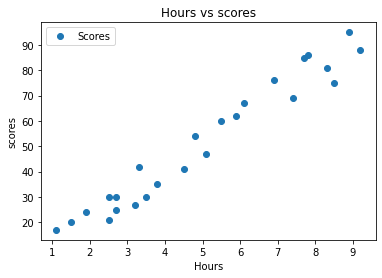

In [5]:
percentage.plot(x="Hours",y="Scores", style='o')
plt.title("Hours vs scores")
plt.xlabel("Hours")
plt.ylabel("scores")
plt.show()

# Preaparing data for training and testing

In [6]:
x=percentage.iloc[:,:-1].values
y=percentage.iloc[:,1:].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


# Training The Model

In [8]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

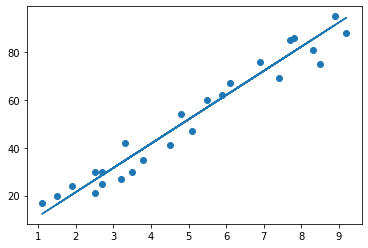

In [9]:
line = regression.coef_*x+regression.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Checking Prediction

In [10]:
y_pred=regression.predict(x_test)

In [11]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,47,52.883846
1,20,16.399233
2,21,26.533848
3,42,34.641540
4,75,87.341536


# Evaluating the Model

In [12]:
from sklearn.metrics import mean_absolute_error
rmse=mean_absolute_error(y_test,y_pred)
rmse

6.943691517751584

# Testing for the value

In [13]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regression.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [94.94249738]
